In [1]:
import numpy as np
from datetime import datetime, timezone
import pandas as pd
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization

In [2]:
data = pd.read_csv("Labeled_Data_from_2021-11-26.csv", sep= ',',header=0, index_col=0)
data1 = pd.read_csv("Labeled_Data_from_2021-12-07.csv", sep= ',',header=0, index_col=0)

In [3]:
print(data)
print(data.info())
print(data1)

                 DateTime  CoolantFlow  ProgramStatus  ProgramDetail  \
0     2021-11-26 07:15:36          0.0            2.0            2.0   
1     2021-11-26 07:15:38          0.0            2.0            2.0   
2     2021-11-26 07:15:40          0.0            2.0            2.0   
6358  2021-11-26 07:15:41          0.0            2.0            2.0   
3     2021-11-26 07:15:42          0.0            2.0            2.0   
...                   ...          ...            ...            ...   
2253  2021-11-26 15:01:50          1.0            2.0            2.0   
2254  2021-11-26 15:01:51          1.0            2.0            2.0   
2255  2021-11-26 15:01:53          1.0            2.0            2.0   
2256  2021-11-26 15:01:57          1.0            2.0            2.0   
2257  2021-11-26 15:01:59          1.0            2.0            2.0   

      ToolNumber  PocketTable  DriveStatus  DoorStatusMain  DoorStatusTooling  \
0            1.0          1.0          1.0            

In [4]:
pd.set_option('display.max_columns', None)
data_all=pd.concat([data, data1])
print(data_all.describe())

        CoolantFlow  ProgramStatus  ProgramDetail    ToolNumber   PocketTable  \
count  21940.000000   21940.000000   21940.000000  21940.000000  21940.000000   
mean       0.315588       1.439107       1.438423     11.023473      4.698952   
std        0.464760       1.634662       1.612797      8.434492      7.231461   
min        0.000000       0.000000       0.000000      0.000000      0.000000   
25%        0.000000       0.000000       0.000000      8.000000      0.000000   
50%        0.000000       2.000000       2.000000      8.000000      1.000000   
75%        1.000000       2.000000       2.000000     19.000000      8.000000   
max        1.000000       6.000000       6.000000     32.000000     30.000000   

        DriveStatus  DoorStatusMain  DoorStatusTooling  CabinDoorLockFront  \
count  21940.000000    21940.000000       21940.000000        21940.000000   
mean       0.541796        0.327940           0.039107            0.000228   
std        0.498261        0.469473 

In [5]:
# delete columns with min=max and std=0
data.pop('CabinDoorLockSide')
data.pop('OverrideSpindle')
data.pop('SpindleApproval')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9597 entries, 0 to 2257
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               9597 non-null   object 
 1   CoolantFlow            9597 non-null   float64
 2   ProgramStatus          9597 non-null   float64
 3   ProgramDetail          9597 non-null   float64
 4   ToolNumber             9597 non-null   float64
 5   PocketTable            9597 non-null   float64
 6   DriveStatus            9597 non-null   float64
 7   DoorStatusMain         9597 non-null   float64
 8   DoorStatusTooling      9597 non-null   float64
 9   CabinDoorLockFront     9597 non-null   float64
 10  DNCMode                9597 non-null   float64
 11  SpindleCleaning        9597 non-null   float64
 12  ChipCleaningGunStatus  9597 non-null   float64
 13  OverrideFeed           9597 non-null   float64
 14  FeedRate               9597 non-null   float64
 15  Spin

In [6]:
# delete columns with min=max and std=0
data1.pop('CabinDoorLockSide')
data1.pop('OverrideSpindle')
data1.pop('SpindleApproval')
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12343 entries, 0 to 11005
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               12343 non-null  object 
 1   CoolantFlow            12343 non-null  float64
 2   ProgramStatus          12343 non-null  float64
 3   ProgramDetail          12343 non-null  float64
 4   ToolNumber             12343 non-null  float64
 5   PocketTable            12343 non-null  float64
 6   DriveStatus            12343 non-null  float64
 7   DoorStatusMain         12343 non-null  float64
 8   DoorStatusTooling      12343 non-null  float64
 9   CabinDoorLockFront     12343 non-null  float64
 10  DNCMode                12343 non-null  float64
 11  SpindleCleaning        12343 non-null  float64
 12  ChipCleaningGunStatus  12343 non-null  float64
 13  OverrideFeed           12343 non-null  float64
 14  FeedRate               12343 non-null  float64
 15  Sp

In [7]:
# look at occurences of columns with low std
print(data_all.ChipCleaningGunStatus.value_counts()) 
print(data_all.DNCMode.value_counts()) 
print(data_all.CabinDoorLockFront.value_counts()) 
print(data_all.RapidTraverseKey.value_counts()) 

1.0    21939
0.0        1
Name: ChipCleaningGunStatus, dtype: int64
0.0    21918
1.0       22
Name: DNCMode, dtype: int64
0.0    21935
1.0        5
Name: CabinDoorLockFront, dtype: int64
0.0    21886
1.0       54
Name: RapidTraverseKey, dtype: int64


In [8]:
data.to_csv("Labeled_Data_from_2021-11-26_Rough.csv")
data1.to_csv("Labeled_Data_from_2021-12-07_Rough.csv")


In [9]:
data_all=pd.concat([data, data1])

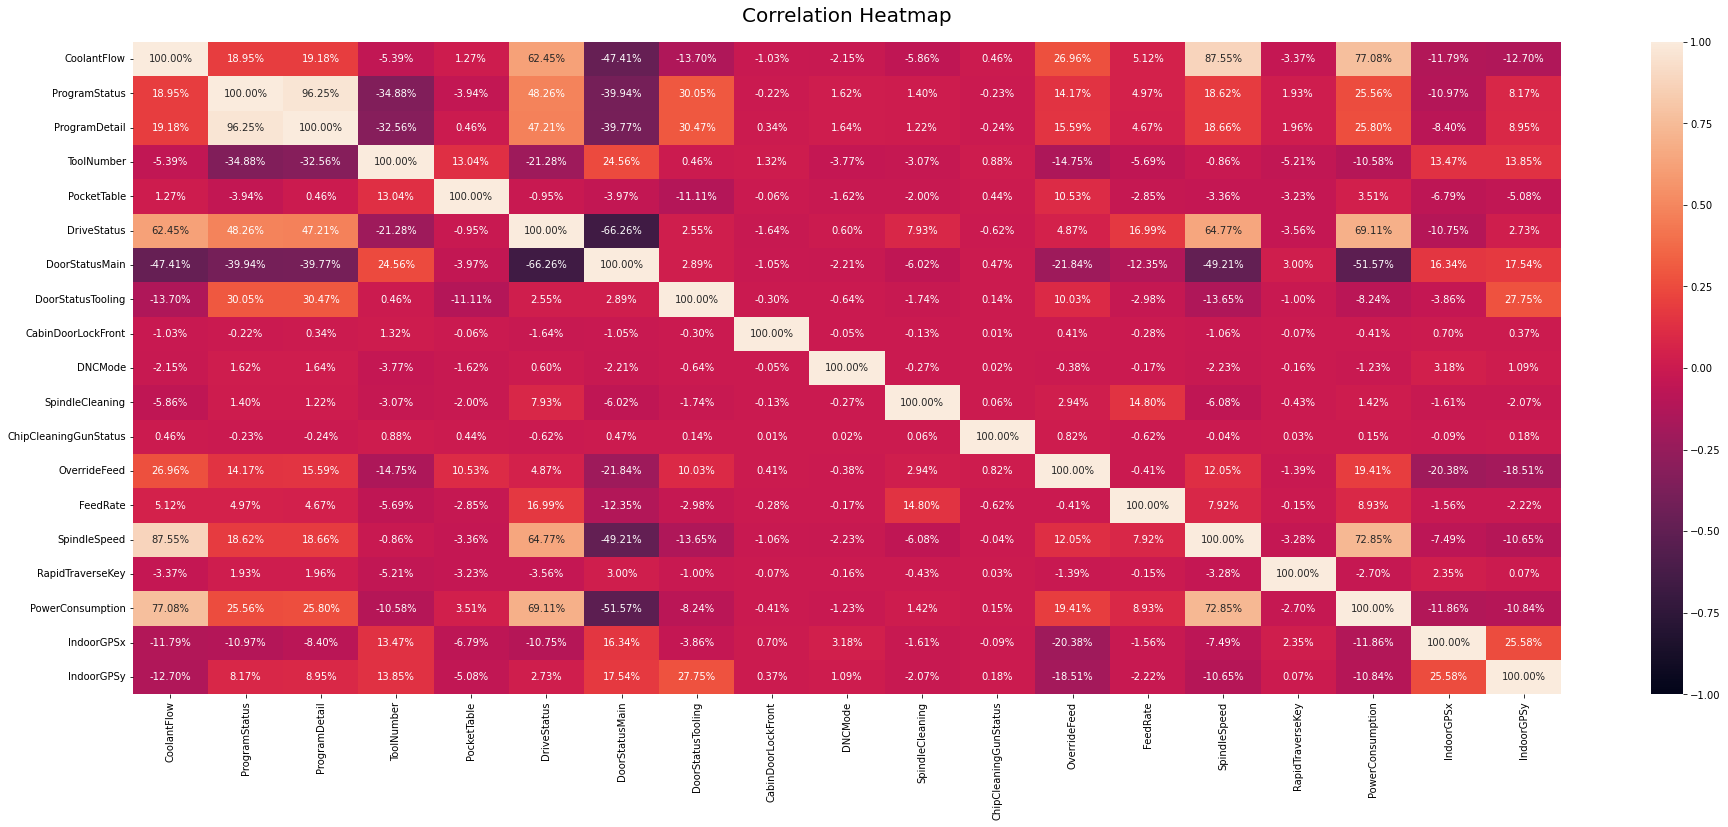

In [10]:
# Correlation heatmap
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(data_all.iloc[:,1:20].corr(), vmin=-1, vmax=1, annot=True, fmt='.2%')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20)
plt.savefig("Korrelation.png", bbox_inches='tight', dpi=600)

In [11]:
data_all.pop('ProgramDetail');

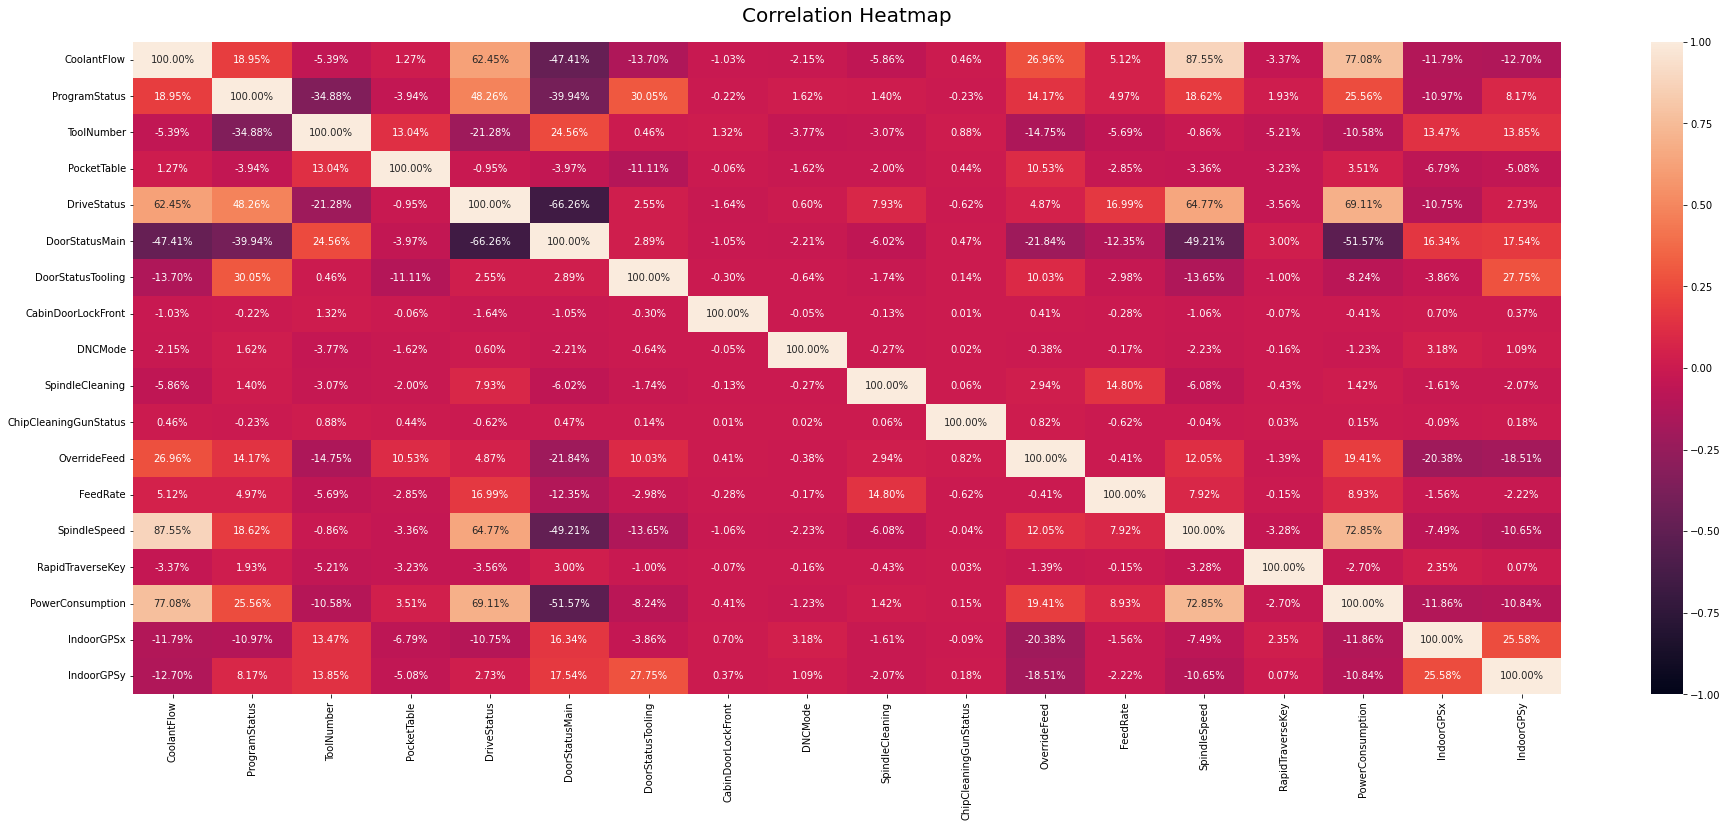

In [12]:
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(data_all.iloc[:,1:19].corr(), vmin=-1, vmax=1, annot=True, fmt='.2%')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20);

In [13]:
data_all.pop('CoolantFlow');

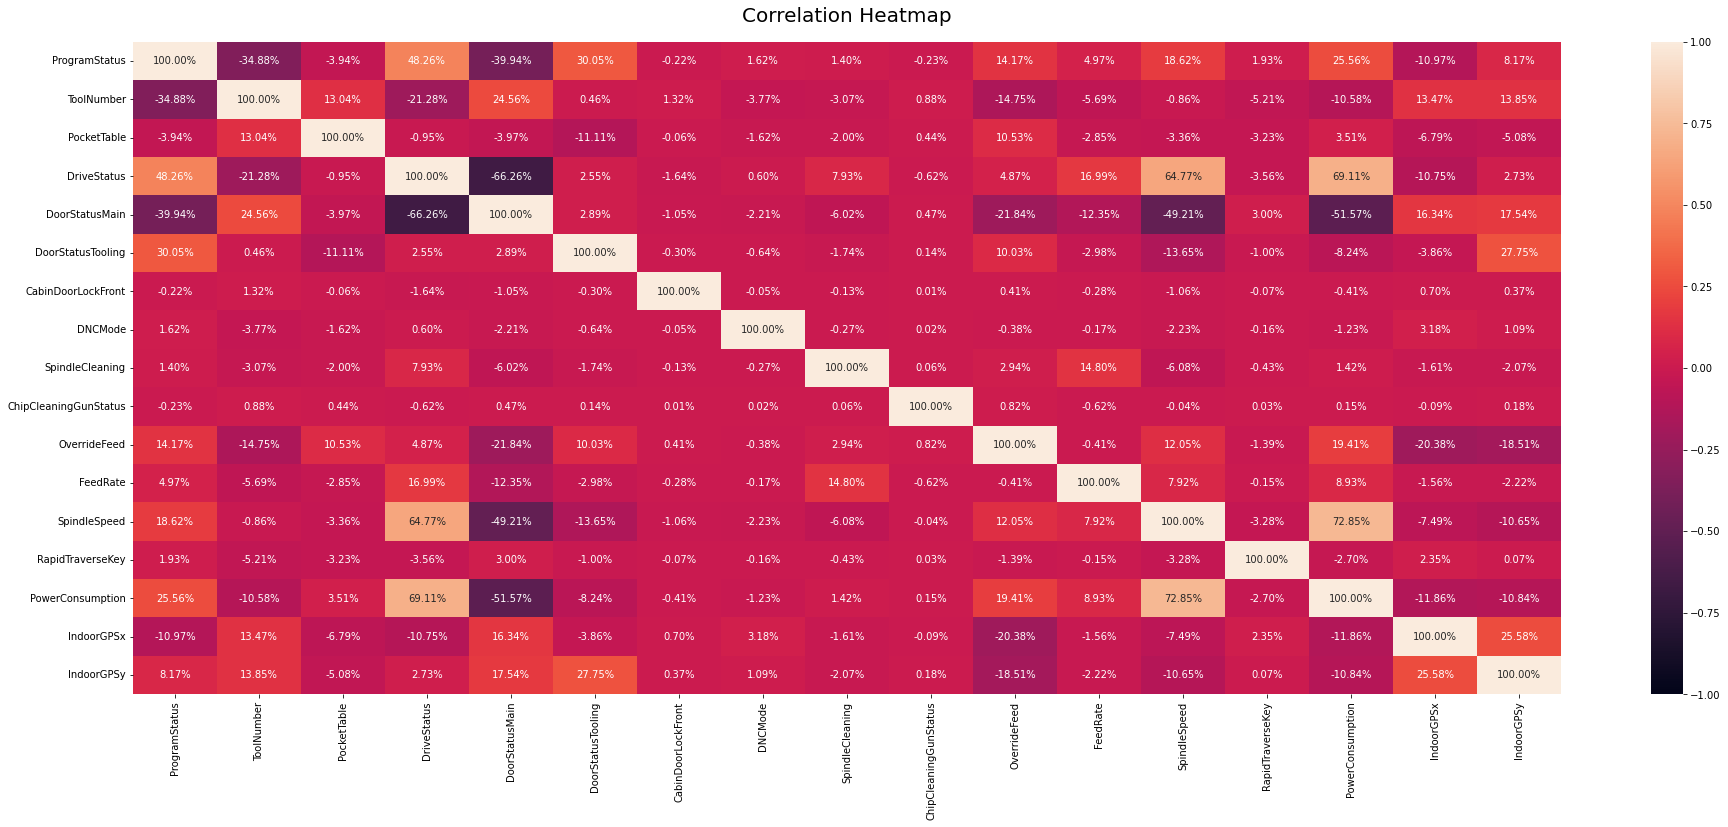

In [14]:
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(data_all.iloc[:,1:18].corr(), vmin=-1, vmax=1, annot=True, fmt='.2%')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20);

In [15]:
data_all.pop('PowerConsumption');

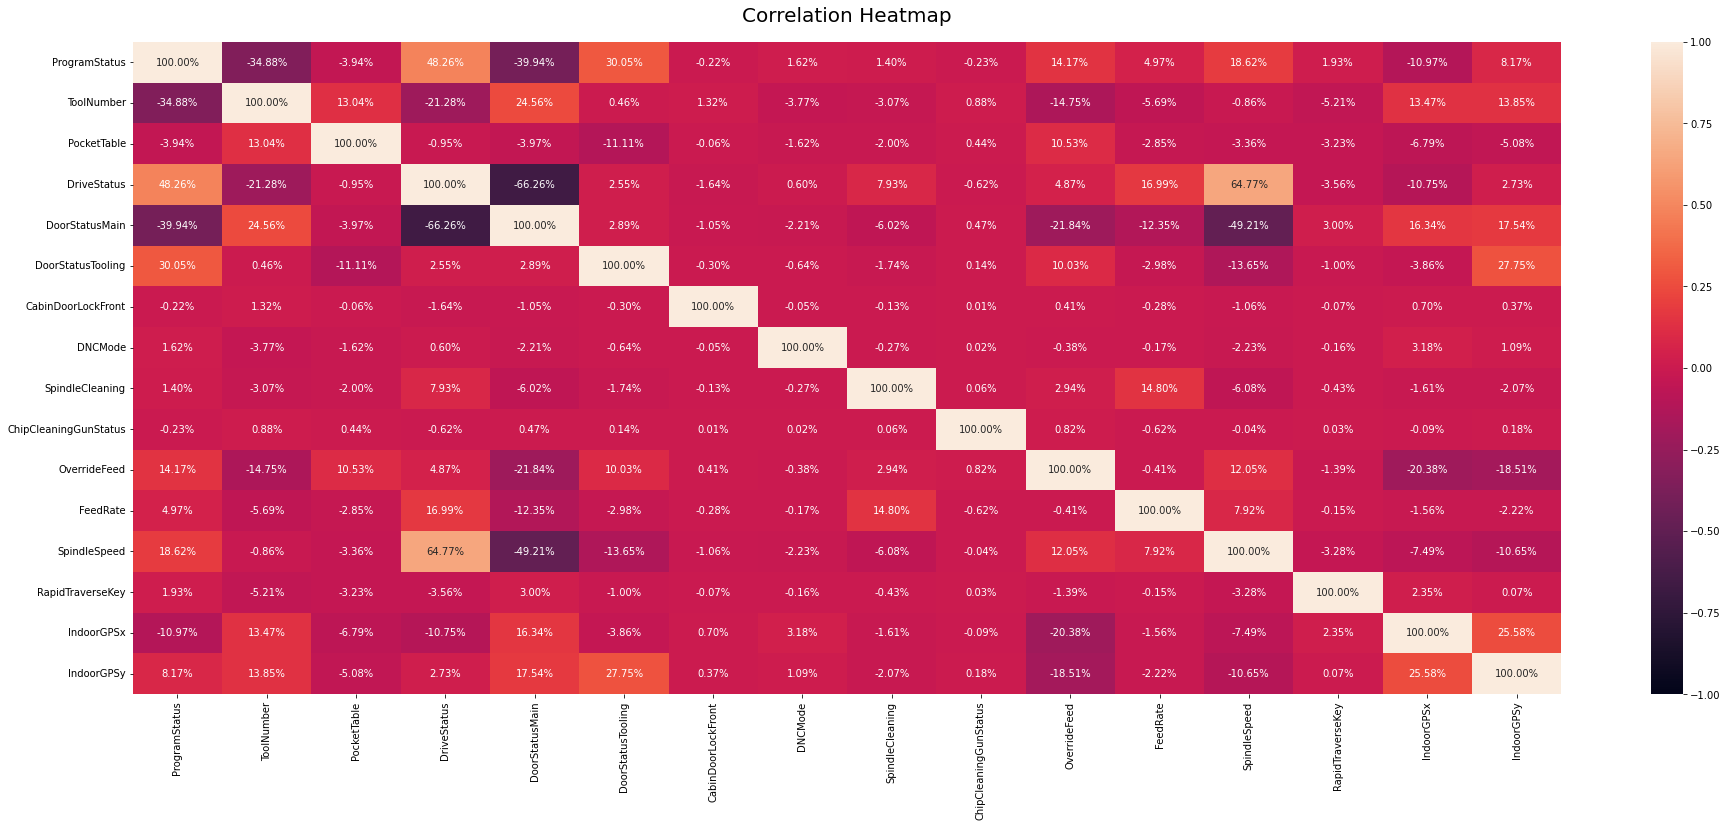

In [16]:
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(data_all.iloc[:,1:17].corr(), vmin=-1, vmax=1, annot=True, fmt='.2%')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20);

In [17]:
data_all.pop('DoorStatusMain');

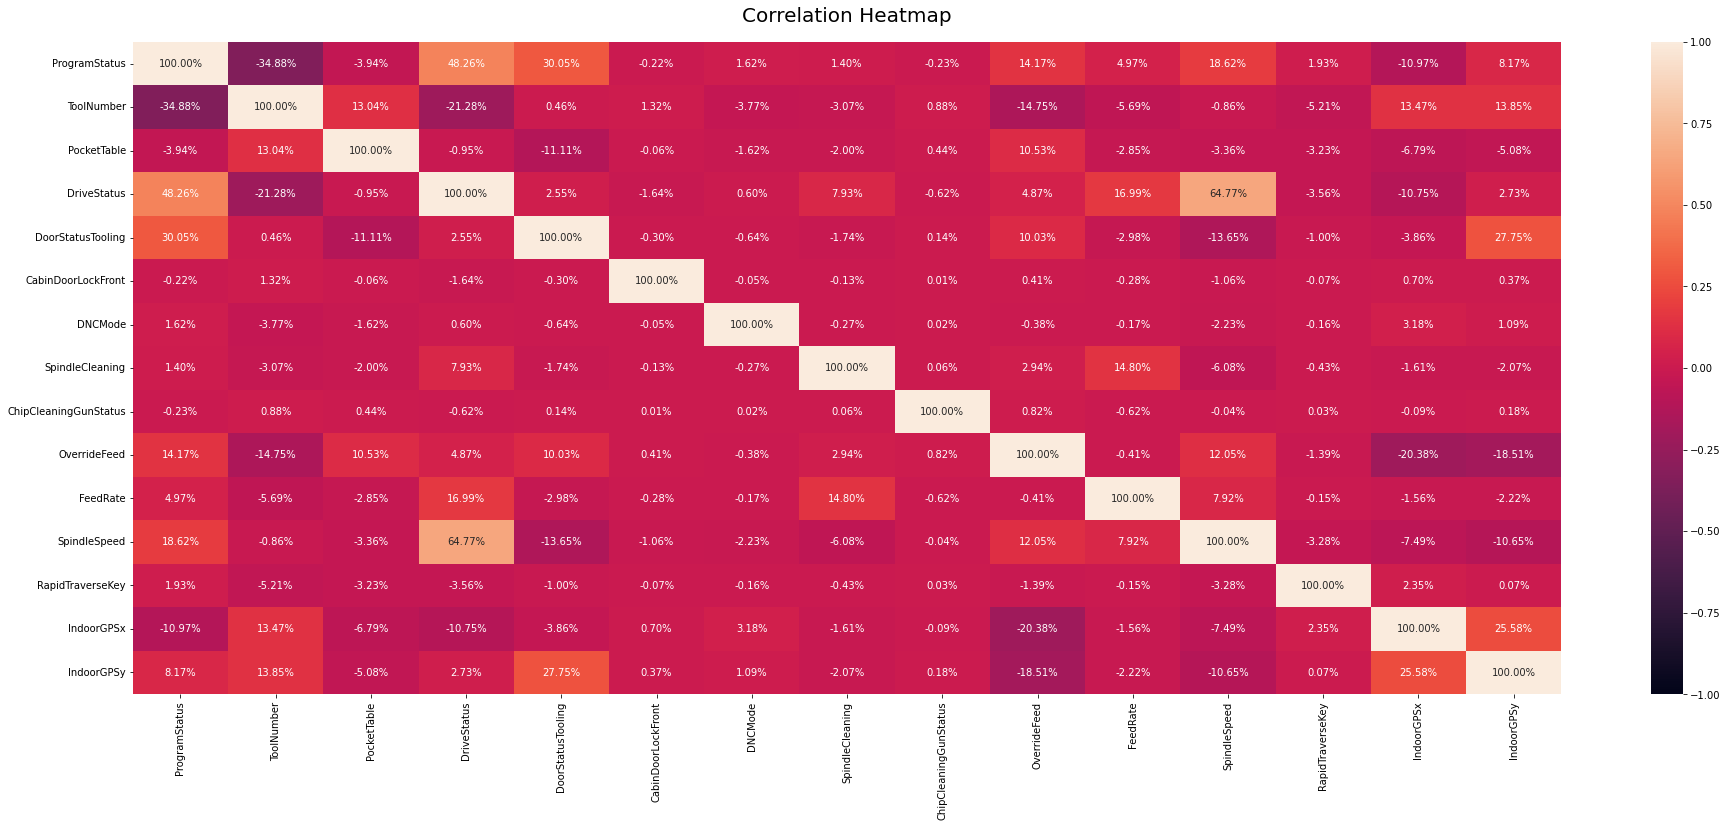

In [18]:
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(data_all.iloc[:,1:16].corr(), vmin=-1, vmax=1, annot=True, fmt='.2%')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20);
plt.savefig("Korrelation_afterkicking.png", bbox_inches='tight', dpi=600)

In [19]:
data.pop('CoolantFlow')
data.pop('ProgramDetail')
data.pop('DoorStatusMain')
data.pop('PowerConsumption');

In [20]:
data1.pop('CoolantFlow')
data1.pop('ProgramDetail')
data1.pop('DoorStatusMain')
data1.pop('PowerConsumption');

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9597 entries, 0 to 2257
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               9597 non-null   object 
 1   ProgramStatus          9597 non-null   float64
 2   ToolNumber             9597 non-null   float64
 3   PocketTable            9597 non-null   float64
 4   DriveStatus            9597 non-null   float64
 5   DoorStatusTooling      9597 non-null   float64
 6   CabinDoorLockFront     9597 non-null   float64
 7   DNCMode                9597 non-null   float64
 8   SpindleCleaning        9597 non-null   float64
 9   ChipCleaningGunStatus  9597 non-null   float64
 10  OverrideFeed           9597 non-null   float64
 11  FeedRate               9597 non-null   float64
 12  SpindleSpeed           9597 non-null   float64
 13  RapidTraverseKey       9597 non-null   float64
 14  IndoorGPSx             9597 non-null   float64
 15  Indo

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12343 entries, 0 to 11005
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               12343 non-null  object 
 1   ProgramStatus          12343 non-null  float64
 2   ToolNumber             12343 non-null  float64
 3   PocketTable            12343 non-null  float64
 4   DriveStatus            12343 non-null  float64
 5   DoorStatusTooling      12343 non-null  float64
 6   CabinDoorLockFront     12343 non-null  float64
 7   DNCMode                12343 non-null  float64
 8   SpindleCleaning        12343 non-null  float64
 9   ChipCleaningGunStatus  12343 non-null  float64
 10  OverrideFeed           12343 non-null  float64
 11  FeedRate               12343 non-null  float64
 12  SpindleSpeed           12343 non-null  float64
 13  RapidTraverseKey       12343 non-null  float64
 14  IndoorGPSx             12343 non-null  float64
 15  In

In [23]:
data.to_csv("Labeled_Data_from_2021-11-26_Corr.csv")
data1.to_csv("Labeled_Data_from_2021-12-07_Corr.csv")